<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [1]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Time related functions.
import time

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score, accuracy_score, precision_score, f1_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
#lets load the dataset
data = pd.read_csv("Churn.csv")

#lets create a copy so we can do the operations and still have the original data safe.
df = data.copy()

## Data Overview

In [4]:
#lets visualize the data.
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Lets check the data shape
df.shape

(10000, 14)

Data seems to have been loaded without issues, we have 10000 and 14 columns.

In [6]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Data seems to be preaty consistent, no major elements that look out of place.

In [8]:
# checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dataset appears to be complete, we need EDA to decide if any adjustments are necessary.


#### Notes on the data
 - We do not need Row Identification, Client Id becaseu they are unique identifiers, no connection to the data.
 - Surname is also a unique identifier in a way, it could influence the model in a uncessary way, so I'll remove it too.

In [9]:
#since this is for the model,  we don't need the row id (RowNumber), we can drop it
df.drop('RowNumber', axis=1, inplace=True)

#since this is for the model,  we don't need the customer id (CustomerId), we can drop it
df.drop('CustomerId', axis=1, inplace=True)

#since this is for the model,  we don't need the customer name (Surname), we can drop it
df.drop('Surname', axis=1, inplace=True)

## Exploratory Data Analysis

### Univariate Analysis

#### Auxiliar functions
Before we start lets define some auxiliary functions so we can plot all the data


In [10]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Function to plot distributions
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

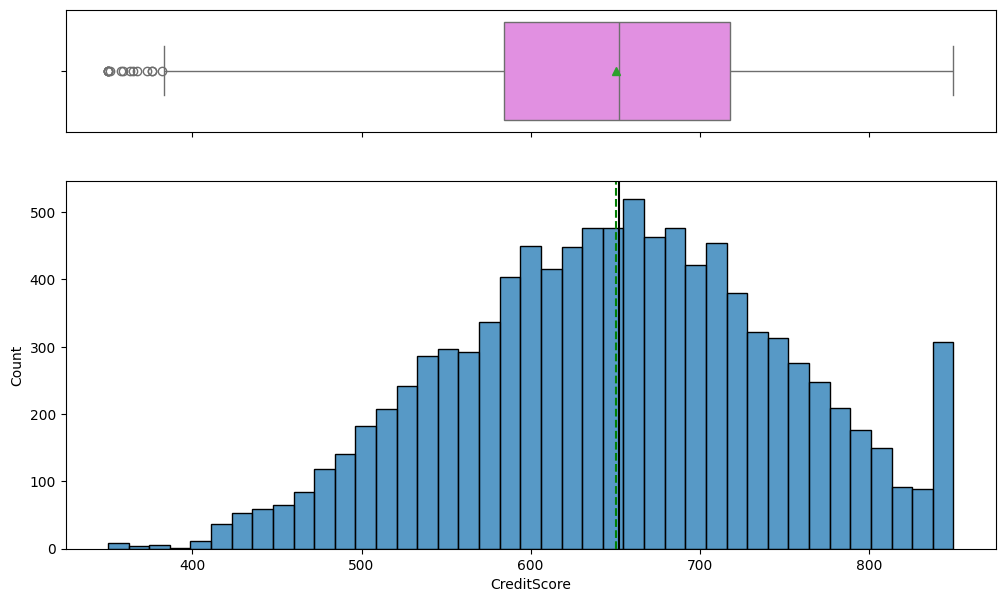

In [11]:
histogram_boxplot(df,'CreditScore')

The data is roughly bell-shaped, centered around 600-700, indicating a near-normal distribution with a slight right skew. There is distinct peak near the upper range (around 800) suggests a specific group with exceptionally high credit scores.

The box plot highlights several low outliers (below 400), suggesting some individuals have significantly lower credit scores compared to the majority.

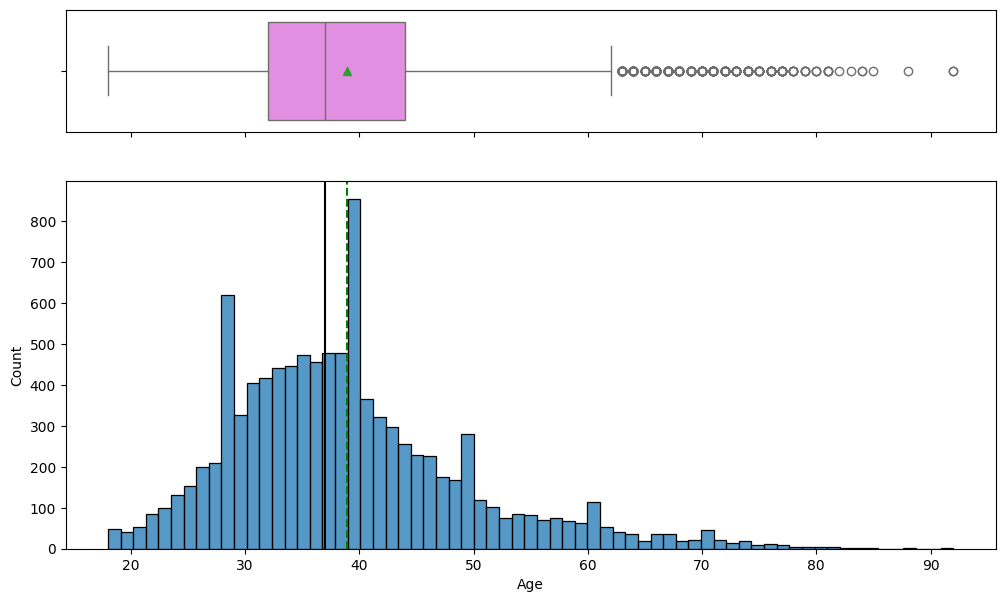

In [12]:
histogram_boxplot(df,'Age')

The age distribution is right-skewed, with the highest frequency around 40 years, indicating a relatively younger population. The box plot shows several outliers on the higher end (above 70), suggesting a few older individuals that significantly deviate from the main age group.

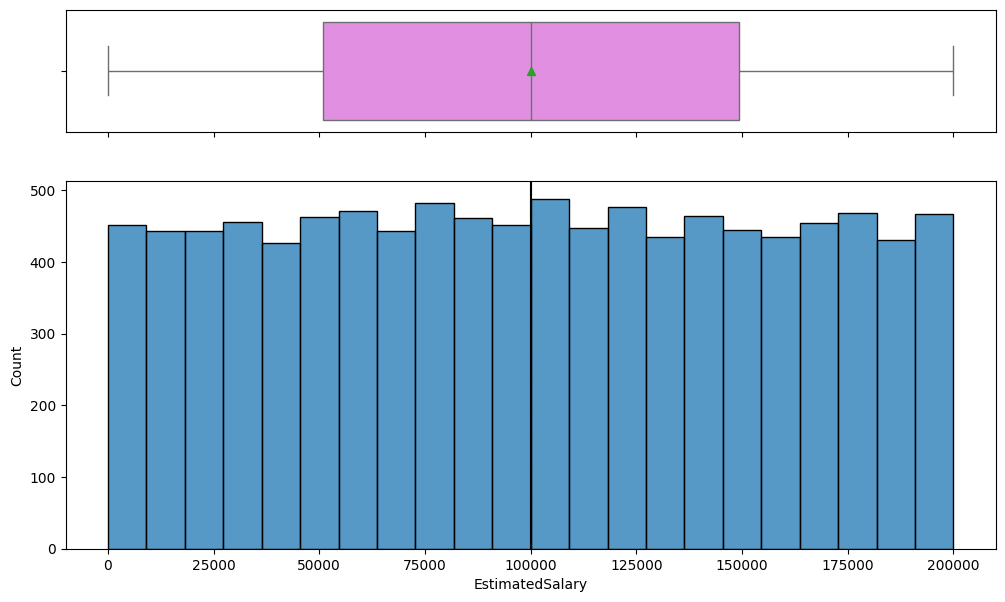

In [13]:
histogram_boxplot(df,'EstimatedSalary')

The histogram shows a nearly uniform distribution of estimated salaries, indicating that salaries are spread fairly evenly across the entire range from 0 to 200,000. The box plot shows a relatively wide range without significant outliers, suggesting that the data is consistent with minimal extreme variations in salary values.

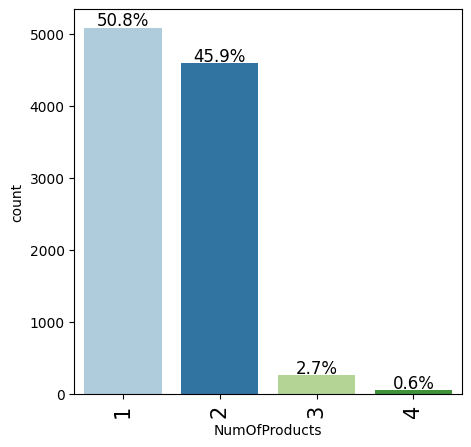

In [14]:
labeled_barplot(df, "NumOfProducts", perc=True)

The majority of individuals have either 1 or 2 products, accounting for 50.8% and 45.9% of the population, respectively, indicating that most customers use a limited number of products.

Business Note: The low percentages for 3 and 4 products highlight an opportunity to explore why customers are not adopting more products and identify potential barriers or opportunities for cross-selling.

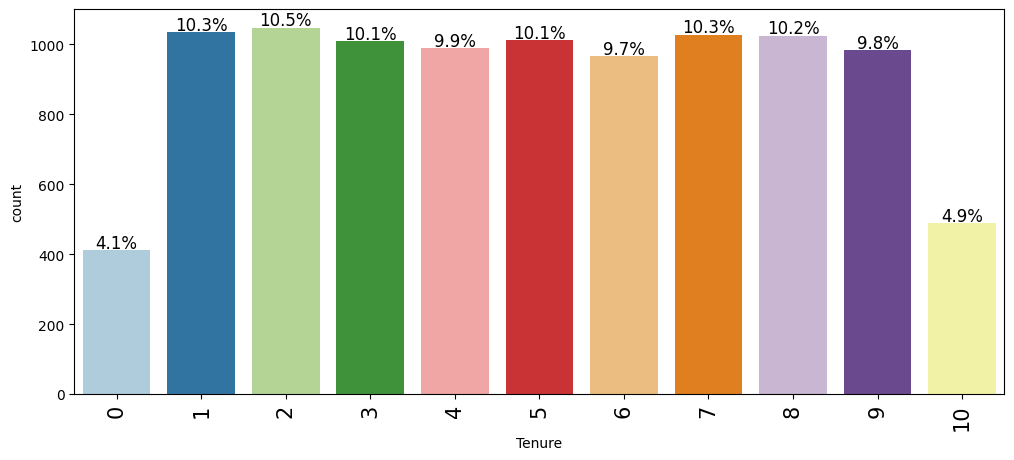

In [15]:
labeled_barplot(df, "Tenure", perc=True)

The relatively uniform percentages across the mid-range tenure values suggest a stable and consistent customer retention pattern without major drops in specific tenure groups.

Business note: The bank seems to have the ability to retain most of its customers, but there is a smaller number of people with 1 year teanure, indicating that we may have a problem with new customers, and if not adjusted it could represent a reduction in terms of overal customers.

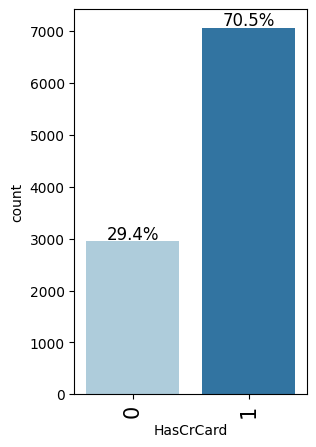

In [16]:
labeled_barplot(df, "HasCrCard", perc=True)

 70.5% of individuals have a credit card, indicating that the majority are engaged with credit products.

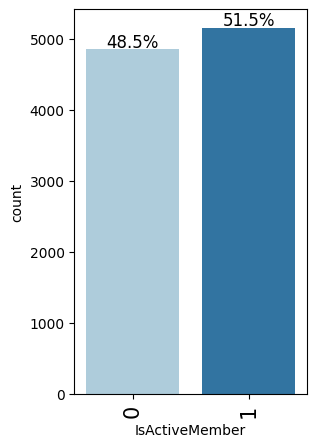

In [17]:
labeled_barplot(df, "IsActiveMember", perc=True)

The data shows a nearly even split between active customers (51.5%) and inactive customers (48.5%), indicating a balanced distribution of engagement.

Business Note: With almost half of the population inactive, there’s a substantial opportunity to implement strategies aimed at converting inactive customers into active ones, potentially improving overall customer engagement.

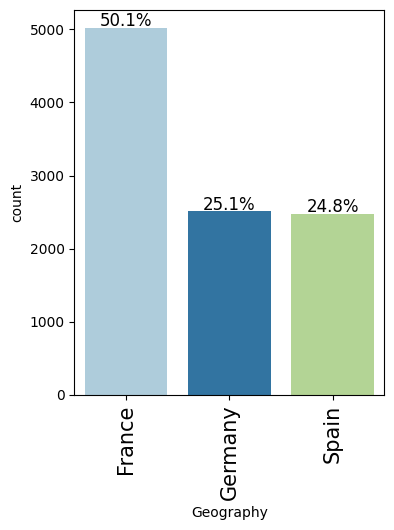

In [18]:
labeled_barplot(df, "Geography", perc=True)

The significant concentration in France suggests that it may be the primary market, while Germany and Spain represent substantial secondary markets, offering potential areas for targeted growth strategies

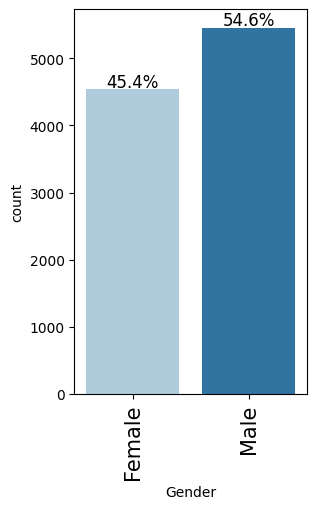

In [19]:
labeled_barplot(df, "Gender", perc=True)

Nearly even distribution of males and females.

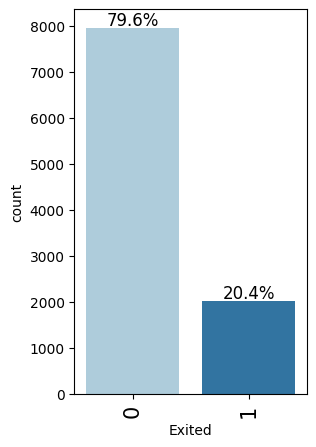

In [20]:
labeled_barplot(df, "Exited", perc=True)

The data seems to be unbalanced, we need to adjust the data distribution for the model.

### Bivariate Analysis

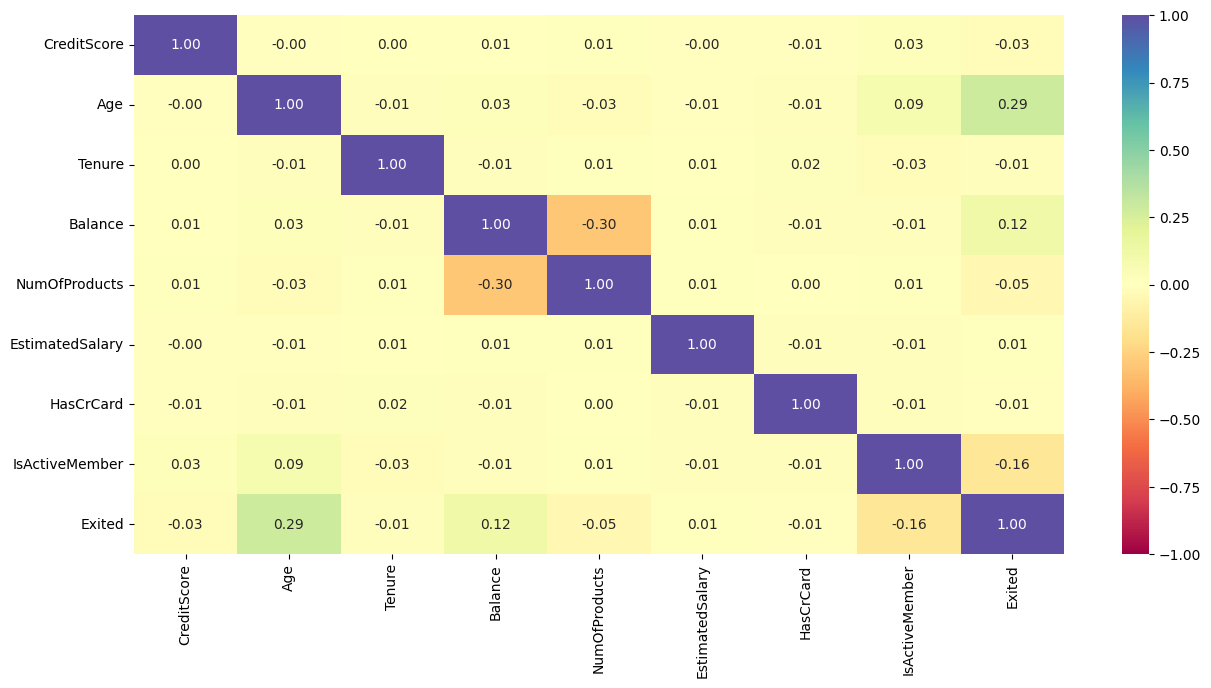

In [21]:
# lets list the inputs that we want to check for the correlation
cols_list = ["CreditScore","Age","Tenure","Balance", "NumOfProducts","EstimatedSalary", "HasCrCard", "IsActiveMember", "Exited"]

plt.figure(figsize=(15, 7))
sns.heatmap(df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is not clear connection between the features and the outcome (exited), the elements with bigger connection are around .3. and only age is connected to exited.

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


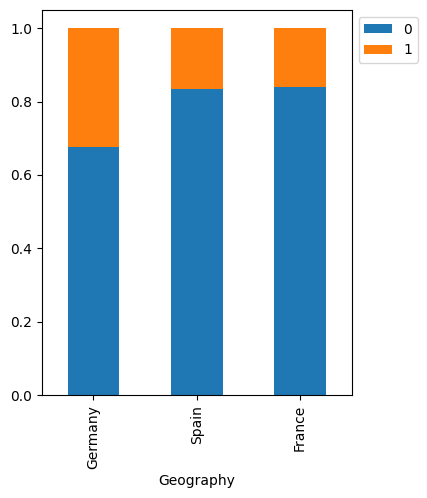

In [22]:
stacked_barplot(df, "Geography", "Exited" )

Germany has the highest exit rate. This indicates a potential issue in this region that might require targeted retention strategies.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


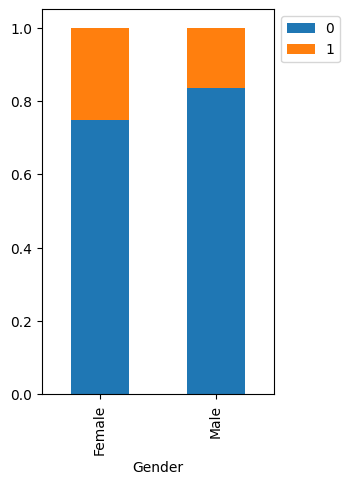

In [23]:
stacked_barplot(df, "Gender", "Exited" )

Females have a higher exit rate compared to males. Females seems to be more likely to leave than males.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


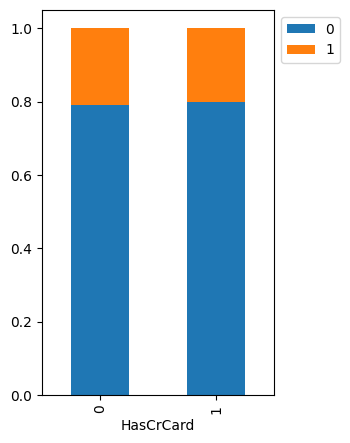

In [24]:
stacked_barplot(df, "HasCrCard", "Exited" )

There is no significant diference when we look at credit card individualy.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


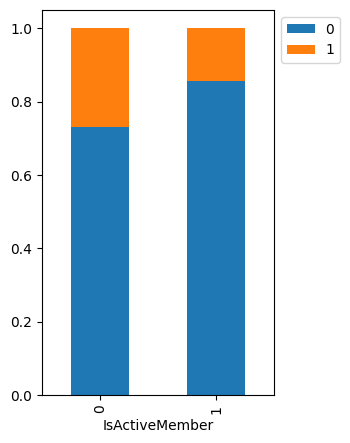

In [25]:
stacked_barplot(df, "IsActiveMember", "Exited" )

Activity seems to have an impact on the churn, there is significantly more inactive clients who have exited.

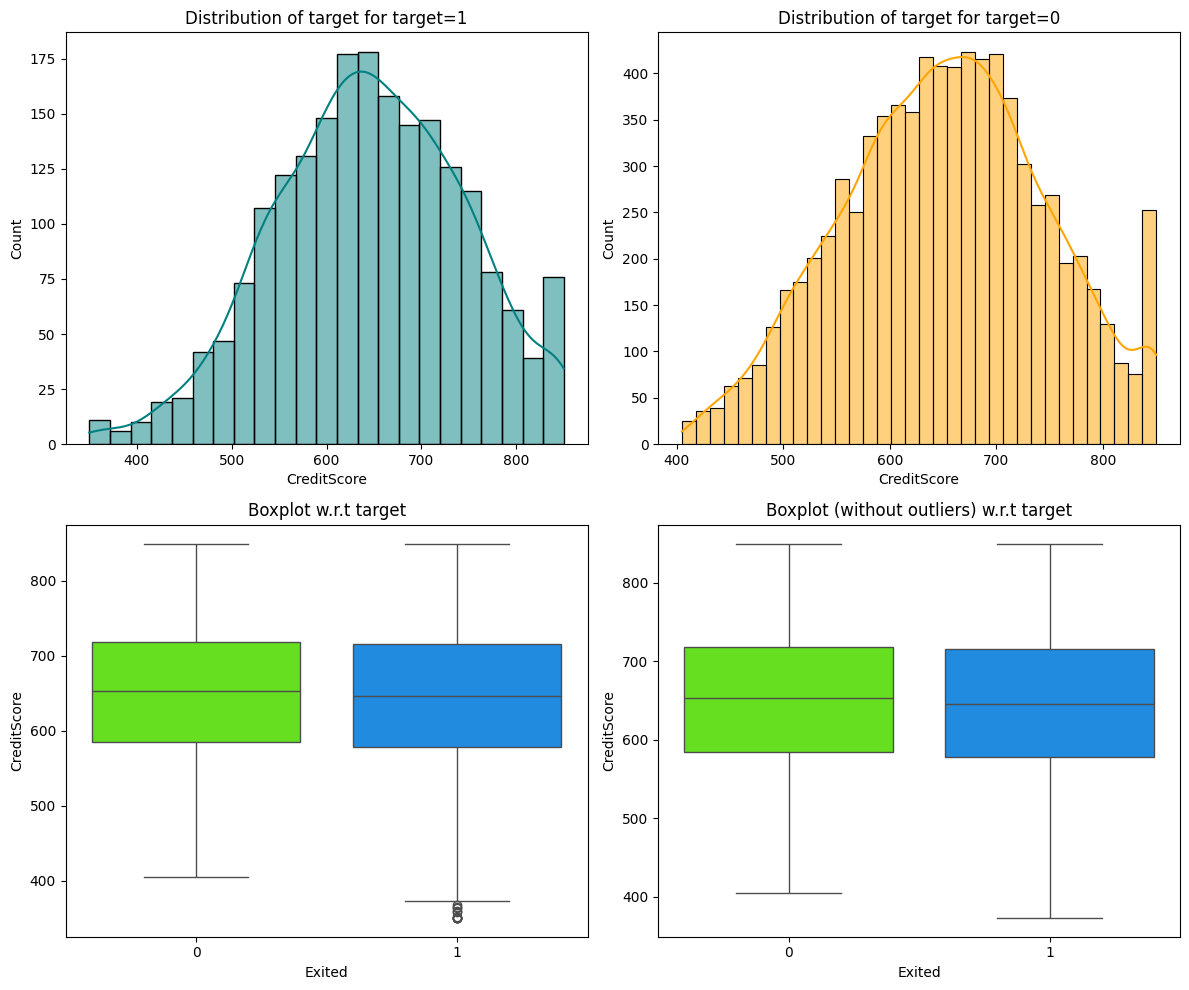

In [26]:
# we need to check how credit score, behaves in relations to the attriation
distribution_plot_wrt_target(df, "CreditScore", "Exited")

The distribution for customers who did not churn (target=0) is slightly skewed left, with a noticeable concentration of lower credit scores compared to those who did not exit. This suggests that higher credit scores may be associated with a higher likelihood of exiting.

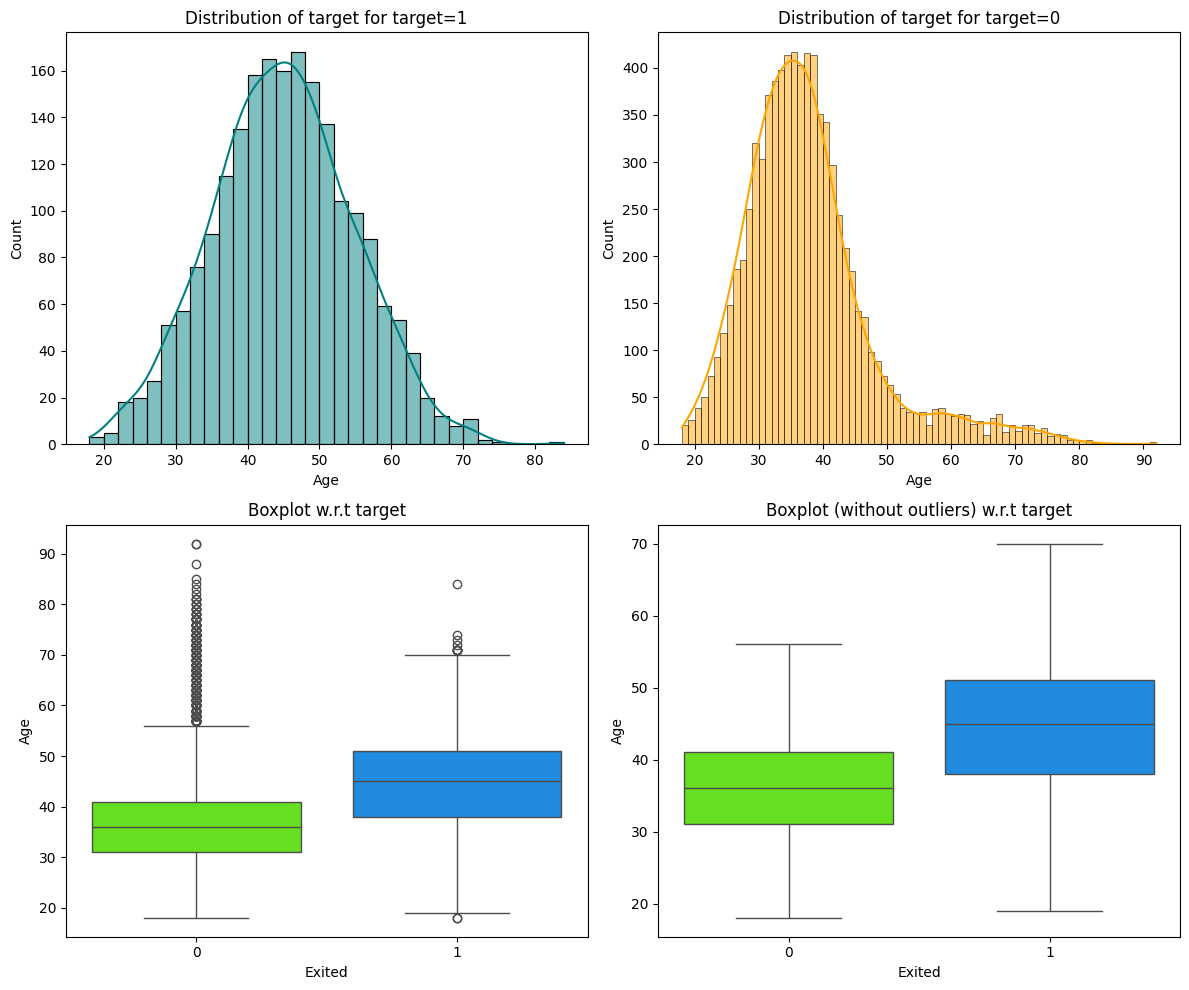

In [27]:
# we need to check how age, behaves in relations to the attriation
distribution_plot_wrt_target(df, "Age", "Exited")

The distribution for customers who exited (target=1) skews toward older ages, peaking around 50, compared to those who did not exit (target=0), where the distribution peaks around 35. This indicates that older customers are more likely to leave. The box plots confirms it with a clear difference in median ages, with exited customers having a higher median age than those who stayed. This suggests age is a notable factor influencing the likelihood of exiting.

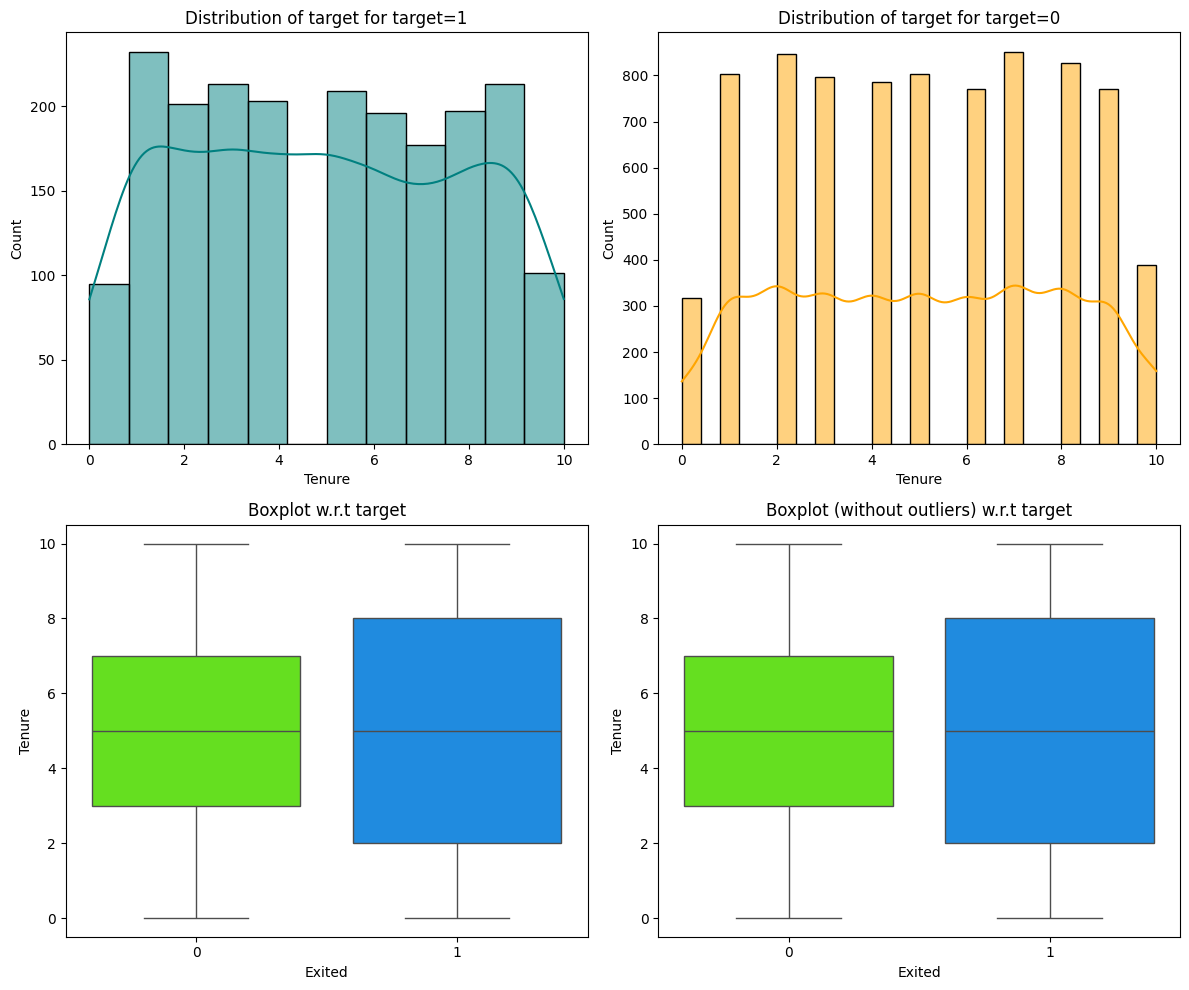

In [28]:
# we need to check how tenure, behaves in relations to the attriation
distribution_plot_wrt_target(df, "Tenure", "Exited")

No significant diference on the distribution between exited or not, implying that tenure alone is not a strong predictor of exit behavior.

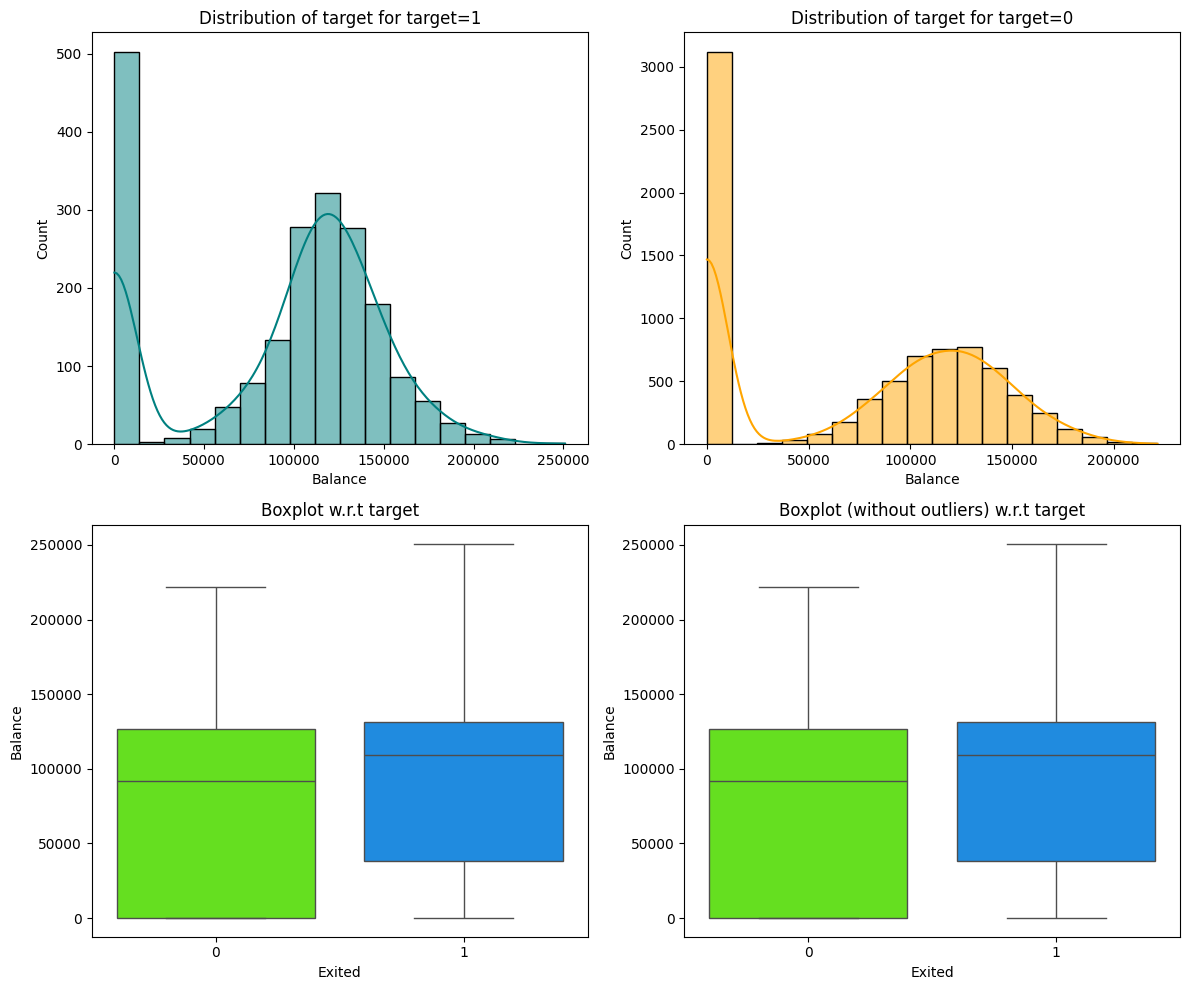

In [29]:
# we need to check how balance, behaves in relations to the attriation
distribution_plot_wrt_target(df, "Balance", "Exited")

No significant diference on the distribution between exited or not, implying that balance alone is not a strong predictor of exit behavior.

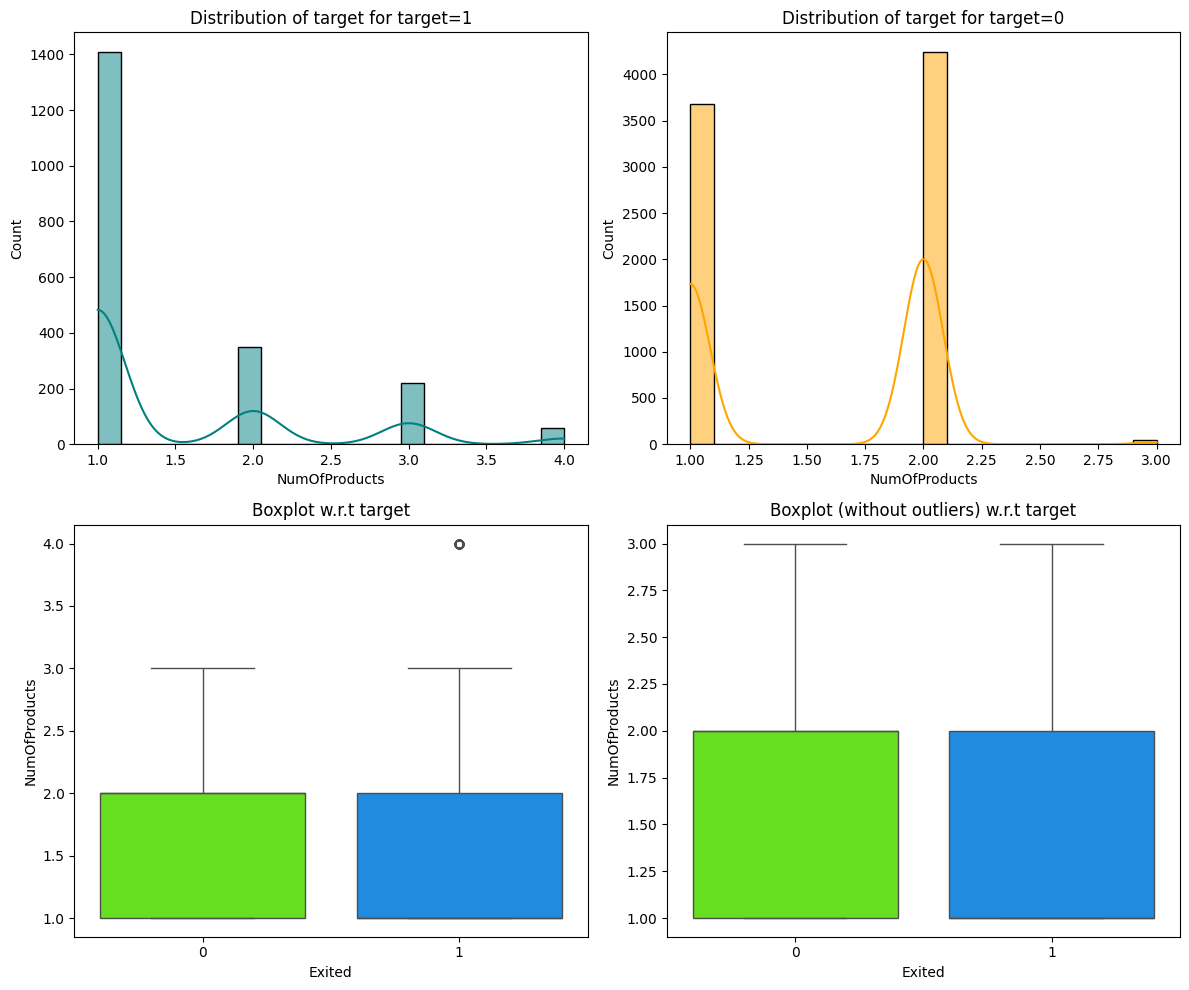

In [30]:
# we need to check how number of products, behaves in relations to the attriation
distribution_plot_wrt_target(df, "NumOfProducts", "Exited")

Increase number of products seems to indicate a low chance of customer leaving. We know there are just a few clients with 3 or 4 products, but there is a significant increase in retention in this case.

Business Note: Increasing client relationship seems to indicate a good customer retention.

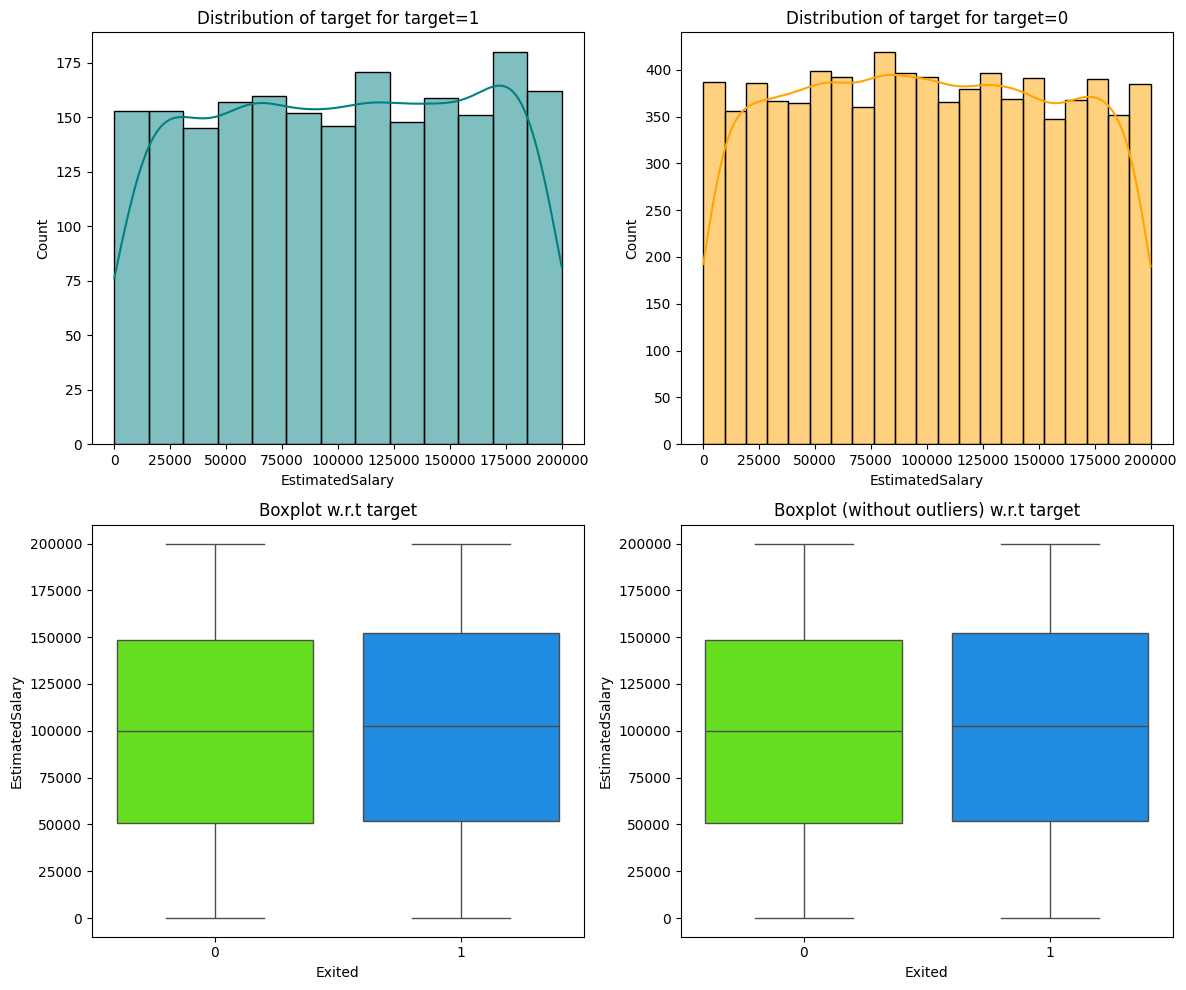

In [31]:
# we need to check how estimated salary, behaves in relations to the attriation
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

Both exited and non-exited customers have a nearly uniform distribution of estimated salaries across all ranges, indicating that salary does not significantly impact the likelihood of exiting or staying.

## Data Preprocessing

### Dummy Variable Creation

In [32]:
df = pd.get_dummies(df,columns=df.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  float64
 10  Geography_Spain    10000 non-null  float64
 11  Gender_Male        10000 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 937.6 KB


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


### Train-validation-test Split

In [33]:
#Spliting features from outcome.
X = df.drop(['Exited'],axis=1)
y = df['Exited']

# Splitting the dataset into the Training and Testing set.
# Need to shuffle given that the data is inbalanced
X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y,shuffle = True)
X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.25, random_state = 42,stratify=y_large, shuffle = True) 

#check on the splits
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


### Data Normalization

In [34]:
# creating an instance of the standard scaler
sc = StandardScaler()
scaler_col_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
X_train[scaler_col_list] = sc.fit_transform(X_train[scaler_col_list])
X_val[scaler_col_list] = sc.transform(X_val[scaler_col_list])    
X_test[scaler_col_list] = sc.transform(X_test[scaler_col_list])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.

### Main goals, and plan to optimize:

Before we start we need to analyse the potential issues, and what are the elemenes we want to maximize.

The model can make two types of mistakes:

* False Positive: Predicting that a customer will churn when, in fact, they won’t.
* False Negative: Predicting that a customer will stay when, in reality, they will churn.


#### Which scenario is more critical?
For the bank, the False Negatives are far more concerning. If my model predicts that a customer will not churn, but they actually do, the bank could lose a valuable customer—a significant asset. That's something I need to minimize as much as possible.

#### How can I reduce False Negatives?
To reduce the risk of missing out on these valuable customers, I need to focus on increasing the model’s Recall. By maximizing Recall, I can ensure that the model correctly identifies more of the customers who are at risk of churning. The higher the Recall, the fewer False Negatives I’ll have, and this means the bank will have a better chance of identifying and retaining these at-risk customers before they leave.

My goal with this model is clear: to help the bank proactively protect its customer base by identifying those most likely to churn, allowing us to take action and retain them.


In [35]:
#lets build some helpful functions
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [36]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

#lets create some lists so we can store the results
train_model_perf = []
val_model_perf = []

### Neural Network with SGD Optimizer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
94/94 [==============================] - 0s 1ms/step - loss: 1.3606 - val_loss: 0.6648
Epoch 2/25
94/94 [==============================] - 0s 473us/step - loss: 1.2878 - val_loss: 0.6330
Epoch 3/25
94/94 [==============================] - 0s 485us/step - loss: 1.2496 - val_loss: 0.6331
Epoch 4/25
94/94 [==============================] - 0s 471us/step - loss: 1.2243 - val_loss: 0.6134
Epoch 5/25
94/94 [==============================] - 0s 452us/step - loss: 1.2046 - val_loss: 0.5814
Epoch 6/25
94/94 [==============================] - 0s 488us/step - loss: 1.1902 - val_loss: 0.6115
Epoch 7/25
94/94 [==============================] - 0s 485us/step - loss: 1.1799 - val_loss: 0.5988
Epoch 8/25
94/94 [==============================] - 0s 447us/step - loss: 1.1707 - val_loss: 0.5703
Epoch 9/25
94/94 [==============================] - 0s 443us/step - loss: 1.1626 - val_loss: 0.5895
Epoch 10/25
94/94 [==============================] - 0s 463us/step - loss: 1.1560 - val_loss: 0.5

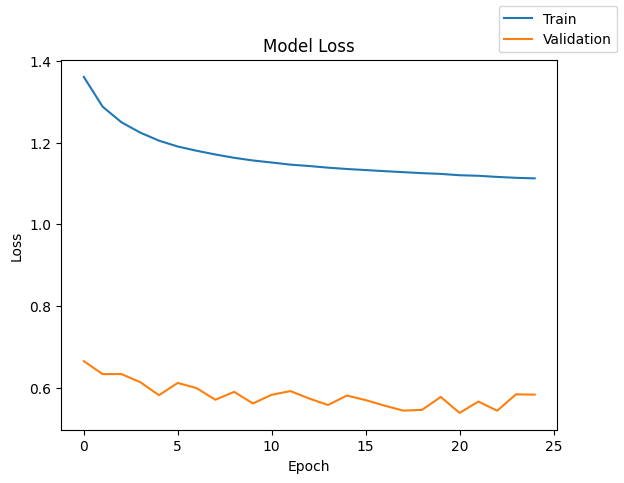

In [37]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

# defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD()    
model.compile(loss='binary_crossentropy', optimizer=optimizer)

#fiting the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

#observing the results
print("Time taken in seconds ",end-start)
plot(history,'loss')

In [38]:
#classify and store results for training
train_perf = model_performance_classification(model, X_train, y_train)
print(train_perf)
train_model_perf.append(train_perf)


#classify and store results for validation
val_perf = model_performance_classification(model, X_val, y_val)
print(val_perf)
val_model_perf.append(train_perf)

188/188 [==============================] - 0s 247us/step
   Accuracy  Recall  Precision  F1 Score
0    0.6945  0.6945   0.808923  0.723269
63/63 [==============================] - 0s 241us/step
   Accuracy  Recall  Precision  F1 Score
0    0.6905  0.6905   0.799946  0.719378


F1 Scores on both cases indicate a consistent performance, but the rate of improvement over epoch is very low.

## Model Performance Improvement

### Neural Network with Adam Optimizer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
94/94 [==============================] - 0s 1ms/step - loss: 1.3436 - val_loss: 0.6235
Epoch 2/25
94/94 [==============================] - 0s 498us/step - loss: 1.2196 - val_loss: 0.5937
Epoch 3/25
94/94 [==============================] - 0s 490us/step - loss: 1.1721 - val_loss: 0.5767
Epoch 4/25
94/94 [==============================] - 0s 473us/step - loss: 1.1526 - val_loss: 0.6071
Epoch 5/25
94/94 [==============================] - 0s 475us/step - loss: 1.1464 - val_loss: 0.5586
Epoch 6/25
94/94 [==============================] - 0s 470us/step - loss: 1.1371 - val_loss: 0.5563
Epoch 7/25
94/94 [==============================] - 0s 470us/step - loss: 1.1305 - val_loss: 0.5664
Epoch 8/25
94/94 [==============================] - 0s 473us/step - loss: 1.1260 - val_loss: 0.5573
Epoch 9/25
94/94 [==============================] - 0s 465us/step - loss: 1.1206 - val_loss: 0.5572
Epoch 10/25
94/94 [==============================] - 0s 468us/step - loss: 1.1165 - val_loss: 0.5

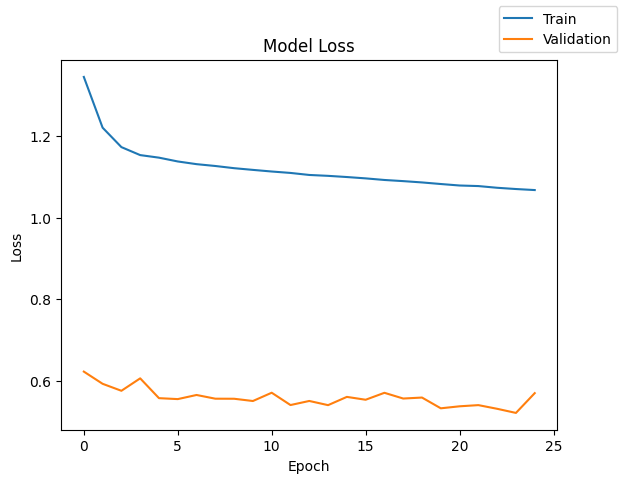

In [39]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

#fiting the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

#observing the results
print("Time taken in seconds ",end-start)
plot(history,'loss')

Loss has come down from previous model, but the learning rate is still not the best.

In [40]:
#classify and store results for training
train_perf = model_performance_classification(model, X_train, y_train)
print(train_perf)
train_model_perf.append(train_perf)


#classify and store results for validation
val_perf = model_performance_classification(model, X_val, y_val)
print(val_perf)
val_model_perf.append(train_perf)

188/188 [==============================] - 0s 232us/step
   Accuracy    Recall  Precision  F1 Score
0  0.716167  0.716167   0.808478  0.741429
63/63 [==============================] - 0s 236us/step
   Accuracy  Recall  Precision  F1 Score
0    0.7105  0.7105   0.799726  0.735948


### Neural Network with Adam Optimizer and Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
94/94 [==============================] - 0s 1ms/step - loss: 1.3957 - val_loss: 0.6187
Epoch 2/25
94/94 [==============================] - 0s 509us/step - loss: 1.3562 - val_loss: 0.6335
Epoch 3/25
94/94 [==============================] - 0s 491us/step - loss: 1.3205 - val_loss: 0.6048
Epoch 4/25
94/94 [==============================] - 0s 480us/step - loss: 1.2962 - val_loss: 0.5973
Epoch 5/25
94/94 [==============================] - 0s 488us/step - loss: 1.2784 - val_loss: 0.5804
Epoch 6/25
94/94 [==============================] - 0s 482us/step - loss: 1.2572 - val_loss: 0.5967
Epoch 7/25
94/94 [==============================] - 0s 485us/step - loss: 1.2322 - val_loss: 0.5740
Epoch 8/25
94/94 [==============================] - 0s 487us/step - loss: 1.2265 - val_loss: 0.5841
Epoch 9/25
94/94 [==============================] - 0s 481us/step - loss: 1.2133 - val_loss: 0.5829
Epoch 10/25
94/94 [==============================] - 0s 483us/step - loss: 1.2179 - val_loss: 0.5

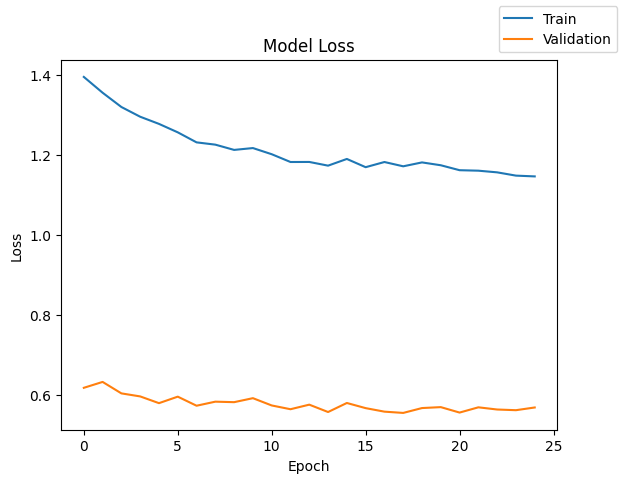

In [41]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

#fiting the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

#observing the results
print("Time taken in seconds ",end-start)
plot(history,'loss')

Adding the dropout seems to made the loss worst for both training and validation

In [42]:
#classify and store results for training
train_perf = model_performance_classification(model, X_train, y_train)
print(train_perf)
train_model_perf.append(train_perf)


#classify and store results for validation
val_perf = model_performance_classification(model, X_val, y_val)
print(val_perf)
val_model_perf.append(train_perf)

188/188 [==============================] - 0s 237us/step
   Accuracy  Recall  Precision  F1 Score
0     0.701   0.701   0.805304   0.72854
63/63 [==============================] - 0s 239us/step
   Accuracy  Recall  Precision  F1 Score
0     0.702   0.702   0.799907  0.728985


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
120/120 [==============================] - 0s 818us/step - loss: 1.7739 - val_loss: 1.0814
Epoch 2/25
120/120 [==============================] - 0s 424us/step - loss: 1.4146 - val_loss: 1.0689
Epoch 3/25
120/120 [==============================] - 0s 417us/step - loss: 1.3512 - val_loss: 1.0183
Epoch 4/25
120/120 [==============================] - 0s 402us/step - loss: 1.3162 - val_loss: 1.0261
Epoch 5/25
120/120 [==============================] - 0s 402us/step - loss: 1.2943 - val_loss: 0.9829
Epoch 6/25
120/120 [==============================] - 0s 399us/step - loss: 1.2781 - val_loss: 0.9843
Epoch 7/25
120/120 [==============================] - 0s 400us/step - loss: 1.2649 - val_loss: 0.9507
Epoch 8/25
120/120 [==============================] - 0s 420us/step - loss: 1.2543 - val_loss: 0.9711
Epoch 9/25
120/120 [==============================] - 0s 428us/step - loss: 1.2459 - val_loss: 0.9586
Epoch 10/25
120/120 [==============================] - 0s 426us/step - loss: 

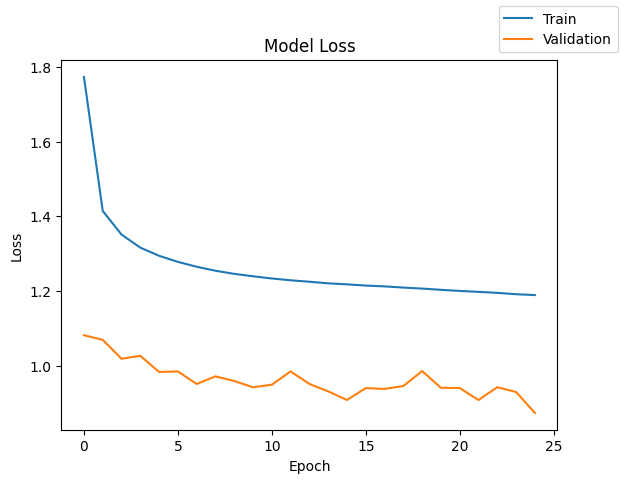

In [43]:
# Splitting the data before applying SMOTE to avoid data leakage
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

# Clearing the current Keras session
tf.keras.backend.clear_session()

# Initializing the neural network
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_train_resampled.shape[1]))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())

# Defining SGD as the optimizer to be used
optimizer = tf.keras.optimizers.SGD()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Fitting the model with resampled data
start = time.time()
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val_smote, y_val_smote), 
                    batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

# Observing the results
print("Time taken in seconds ", end - start)
plot(history, 'loss')


No significan progress on loss

In [44]:
#classify and store results for training
train_perf = model_performance_classification(model, X_train, y_train)
print(train_perf)
train_model_perf.append(train_perf)


#classify and store results for validation
val_perf = model_performance_classification(model, X_val, y_val)
print(val_perf)
val_model_perf.append(train_perf)

188/188 [==============================] - 0s 243us/step
   Accuracy    Recall  Precision  F1 Score
0  0.502833  0.502833   0.809598   0.53355
63/63 [==============================] - 0s 283us/step
   Accuracy  Recall  Precision  F1 Score
0    0.4995  0.4995    0.79555  0.532129


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
120/120 [==============================] - 0s 922us/step - loss: 1.5357 - val_loss: 1.1211
Epoch 2/25
120/120 [==============================] - 0s 438us/step - loss: 1.3478 - val_loss: 1.0094
Epoch 3/25
120/120 [==============================] - 0s 436us/step - loss: 1.2854 - val_loss: 0.9685
Epoch 4/25
120/120 [==============================] - 0s 436us/step - loss: 1.2409 - val_loss: 0.9866
Epoch 5/25
120/120 [==============================] - 0s 428us/step - loss: 1.2102 - val_loss: 0.9771
Epoch 6/25
120/120 [==============================] - 0s 412us/step - loss: 1.1887 - val_loss: 0.9190
Epoch 7/25
120/120 [==============================] - 0s 406us/step - loss: 1.1712 - val_loss: 0.9014
Epoch 8/25
120/120 [==============================] - 0s 405us/step - loss: 1.1564 - val_loss: 0.8916
Epoch 9/25
120/120 [==============================] - 0s 415us/step - loss: 1.1429 - val_loss: 0.8678
Epoch 10/25
120/120 [==============================] - 0s 403us/step - loss: 

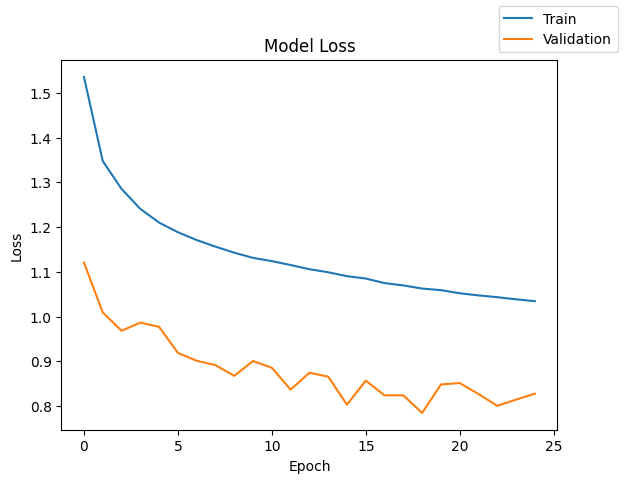

In [45]:
# Splitting the data before applying SMOTE to avoid data leakage
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

# Clearing the current Keras session
tf.keras.backend.clear_session()

# Initializing the neural network
model = Sequential()
model.add(Dense(14, activation="relu", input_dim=X_train_resampled.shape[1]))
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
print(model.summary())

# Defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Fitting the model with resampled data
start = time.time()
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val_smote, y_val_smote), 
                    batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

# Observing the results
print("Time taken in seconds ", end - start)
plot(history, 'loss')


Improvement on loss was good, but overall loss number still on the same threashold.

In [46]:
#classify and store results for training
train_perf = model_performance_classification(model, X_train, y_train)
print(train_perf)
train_model_perf.append(train_perf)


#classify and store results for validation
val_perf = model_performance_classification(model, X_val, y_val)
print(val_perf)
val_model_perf.append(train_perf)

188/188 [==============================] - 0s 241us/step
   Accuracy    Recall  Precision  F1 Score
0  0.560667  0.560667   0.828744  0.594639
63/63 [==============================] - 0s 232us/step
   Accuracy  Recall  Precision  F1 Score
0     0.551   0.551    0.81439  0.586208


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
120/120 [==============================] - 0s 935us/step - loss: 2.0793 - val_loss: 1.1073
Epoch 2/25
120/120 [==============================] - 0s 436us/step - loss: 1.6383 - val_loss: 1.0946
Epoch 3/25
120/120 [==============================] - 0s 445us/step - loss: 1.5206 - val_loss: 1.0610
Epoch 4/25
120/120 [==============================] - 0s 430us/step - loss: 1.4657 - val_loss: 1.0632
Epoch 5/25
120/120 [==============================] - 0s 425us/step - loss: 1.4412 - val_loss: 1.0505
Epoch 6/25
120/120 [==============================] - 0s 422us/step - loss: 1.4261 - val_loss: 1.0336
Epoch 7/25
120/120 [==============================] - 0s 423us/step - loss: 1.3870 - val_loss: 1.0383
Epoch 8/25
120/120 [==============================] - 0s 422us/step - loss: 1.3691 - val_loss: 1.0184
Epoch 9/25
120/120 [==============================] - 0s 423us/step - loss: 1.3547 - val_loss: 1.0099
Epoch 10/25
120/120 [==============================] - 0s 419us/step - loss: 

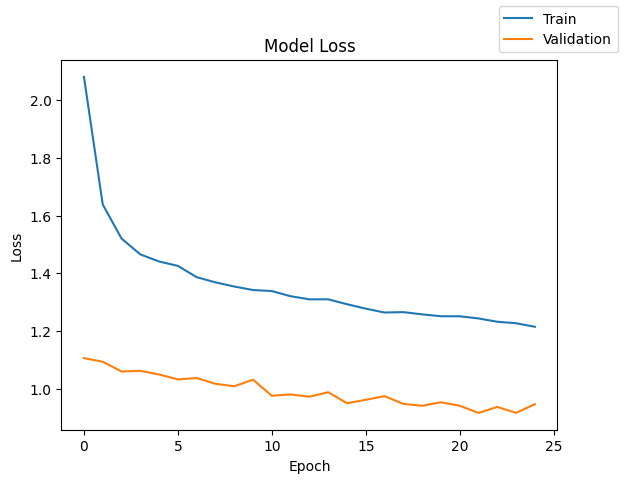

In [47]:
# Splitting the data before applying SMOTE to avoid data leakage
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_smote, y_train_smote)

# Clearing the current Keras session
tf.keras.backend.clear_session()

# Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.15))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

# Defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

# Fitting the model with resampled data
start = time.time()
history = model.fit(X_train_resampled, y_train_resampled, validation_data=(X_val_smote, y_val_smote), 
                    batch_size=batch_size, epochs=epochs, class_weight=cw_dict)
end = time.time()

# Observing the results
print("Time taken in seconds ", end - start)
plot(history, 'loss')


No significant improvement

In [48]:
#classify and store results for training
train_perf = model_performance_classification(model, X_train, y_train)
print(train_perf)
train_model_perf.append(train_perf)


#classify and store results for validation
val_perf = model_performance_classification(model, X_val, y_val)
print(val_perf)
val_model_perf.append(train_perf)

188/188 [==============================] - 0s 232us/step
   Accuracy    Recall  Precision  F1 Score
0  0.431167  0.431167   0.821158  0.443901
63/63 [==============================] - 0s 231us/step
   Accuracy  Recall  Precision  F1 Score
0    0.4275  0.4275   0.808271  0.441791


## Model Performance Comparison and Final Model Selection

In [49]:
# training performance comparison
models_train_comp_df = pd.concat(
    [
        train_model_perf[0].T,
        train_model_perf[1].T,
        train_model_perf[2].T,
        train_model_perf[3].T,
        train_model_perf[4].T,
        train_model_perf[5].T
    ],
    axis=1,
)

#Validation performance comparison
models_val_comp_df = pd.concat(
    [
        val_model_perf[0].T,
        val_model_perf[1].T,
        val_model_perf[2].T,
        val_model_perf[3].T,
        val_model_perf[4].T,
        val_model_perf[5].T
    ],
    axis=1,
)

models_tested = [
    "Neural Network with SGD Optimizer",
    "Neural Network with Adam Optimizer",
    "Neural Network with Adam Optimizer and Dropout",
    "Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer",
    "Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout [0.3, 0.15]"
]

models_train_comp_df.columns = models_tested
models_val_comp_df.columns = models_tested

In [50]:
models_train_comp_df

,Neural Network with SGD Optimizer,Neural Network with Adam Optimizer,Neural Network with Adam Optimizer and Dropout,Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer,Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer,"Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout [0.3, 0.15]"
Accuracy,0.694500,0.716167,0.701000,0.502833,0.560667,0.431167
Recall,0.694500,0.716167,0.701000,0.502833,0.560667,0.431167
Precision,0.808923,0.808478,0.805304,0.809598,0.828744,0.821158
F1 Score,0.723269,0.741429,0.728540,0.533550,0.594639,0.443901


In [51]:
models_val_comp_df

,Neural Network with SGD Optimizer,Neural Network with Adam Optimizer,Neural Network with Adam Optimizer and Dropout,Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer,Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer,"Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout [0.3, 0.15]"
Accuracy,0.694500,0.716167,0.701000,0.502833,0.560667,0.431167
Recall,0.694500,0.716167,0.701000,0.502833,0.560667,0.431167
Precision,0.808923,0.808478,0.805304,0.809598,0.828744,0.821158
F1 Score,0.723269,0.741429,0.728540,0.533550,0.594639,0.443901


When compared side by side, we can clearly see that the simpler neural network with just SGD or Adam optimizers achive the best results, when we compare the reall wich is the outcome we want to optmize for. They also have the hiher F1 Score (~0.75), wich indicates strong performance in learning from the training data.

Between the models the Adam Optmizer seems to have a small edge, but the training time was higher

 - SGD Optimizer: 1.2915709018707275
 - Adam Optimizer: 1.3938379287719727

Altough the difference is only 8% in a large dataset it could make a difference, for this specific case, since the dataset is small I'll select the Neural Network with Adam Optmizer as the model to go forward.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 281 (1.10 KB)
Trainable params: 281 (1.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None
Epoch 1/25
94/94 [==============================] - 0s 1ms/step - loss: 1.3644 - val_loss: 0.6813
Epoch 2/25
94/94 [==============================] - 0s 504us/step - loss: 1.2544 - val_loss: 0.6053
Epoch 3/25
94/94 [==============================] - 0s 485us/step - loss: 1.1968 - val_loss: 0.6056
Epoch 4/25
94/94 [==============================] - 0s 562us/step - loss: 1.1684 - val_loss: 0.5915
Epoch 5/25
94/94 [==============================] - 0s 477us/step - loss: 1.1545 - val_loss: 0.5913
Epoch 6/25
94/94 [==============================] - 0s 478us/step - loss: 1.1452 - val_loss: 0.5667
Epoch 7/25
94/94 [==============================] - 0s 473us/step - loss: 1.1366 - val_loss: 0.5582
Epoch 8/25
94/94 [==============================] - 0s 473us/step - loss: 1.1307 - val_loss: 0.5551
Epoch 9/25
94/94 [==============================] - 0s 462us/step - loss: 1.1255 - val_loss: 0.5639
Epoch 10/25
94/94 [==============================] - 0s 476us/step - loss: 1.1188 - val_loss: 0.5

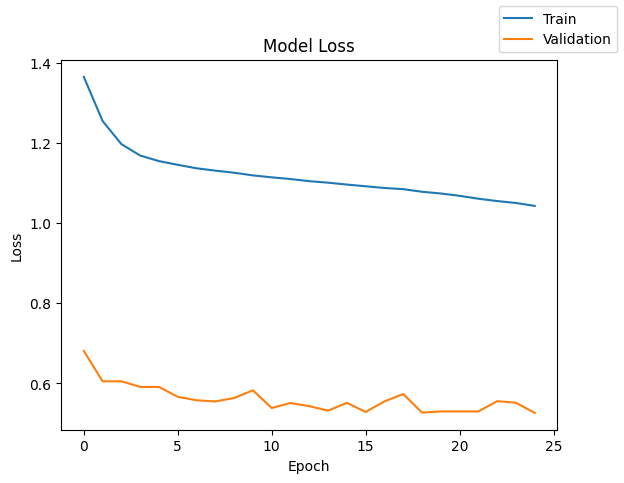

In [52]:
#Lets run the wining model on the test data

# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())

# defining Adam as the optimizer to be used
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy', optimizer=optimizer)

#fiting the model
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

#observing the results
print("Time taken in seconds ",end-start)
plot(history,'loss')


y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [53]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_val,y_val_pred>0.5)
print(cr)

print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      4777
           1       0.44      0.73      0.55      1223

    accuracy                           0.75      6000
   macro avg       0.68      0.74      0.69      6000
weighted avg       0.82      0.75      0.77      6000

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1593
           1       0.42      0.69      0.52       407

    accuracy                           0.75      2000
   macro avg       0.66      0.72      0.68      2000
weighted avg       0.81      0.75      0.77      2000

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      1593
           1       0.43      0.73      0.54       407

    accuracy                           0.75      2000
   macro avg    

## Actionable Insights and Business Recommendations


* Address High Attrition in New Customers: The data shows a smaller number of customers with a tenure of one year, suggesting potential issues with retaining new clients. Recommendation: Implement targeted onboarding and engagement strategies for new customers, such as personalized follow-ups, welcome offers, or loyalty incentives to increase retention rates among this group​.

* Increase Product Adoption to Enhance Retention: Customers with more products tend to stay longer with the company, yet only a small percentage have three or four products. Recommendation: Develop cross-selling and up-selling strategies to encourage existing customers to adopt additional products. This can be achieved through personalized recommendations and promotions that align with their needs and usage patterns.

* Convert Inactive Customers into Active Ones: Nearly half of the customer base is inactive, representing a significant opportunity to boost engagement. Recommendation: Design targeted reactivation campaigns, such as special offers or tailored communications, to encourage inactive customers to engage with your services again.

* Focus on Enhancing Customer Experience for Credit Card Holders: The data shows a varied impact of credit card ownership on customer engagement. Recommendation: Review the credit card offerings and customer service experience, ensuring that credit card holders receive value-added services that enhance their overall satisfaction and engagement.

* Implement Feedback Mechanisms to Understand Low Adoption Rates: With low product adoption rates beyond the first two products, there may be barriers to customers taking up additional services. Recommendation: Conduct customer feedback surveys or focus groups to identify reasons for low adoption and use this insight to adjust product offerings or marketing messages.

